Nama    : Cetta Maulana Andhika
Kelas   : TK-45-04
NIM     : 1103213119
Judul   : Week 2, Logistic Regression, text.csv

GPT Prompt : "buatkan saya kode python untuk membuat model logistic regression dengan dataset text.csv"

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv("Dataset\\text.csv")

# Menampilkan lima baris pertama dataset
print(data.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


GPT Prompt : "visualisasikan dengan matplotlib"
data berisi 2 features, yaitu "text" dan "label" dengan keterangan,<br>
0 is sadness<br>
1 is joy<br>
2 is love<br>
3 is anger<br>
4 is fear<br>
and 5 is suprise<br>

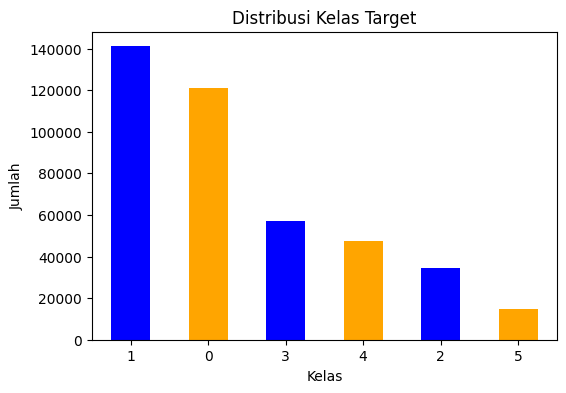

In [2]:
plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [3]:
# Memisahkan data teks dan target
X = data['text']
y = data['label']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [4]:
# Membuat model regresi logistik
log_reg = LogisticRegression(max_iter=100)

# Melatih model regresi logistik
log_reg.fit(X_train_vectorized, y_train)

# Memprediksi kelas target pada data uji
y_pred = log_reg.predict(X_test_vectorized)

1
2
3


c:\Users\cetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model: {:.2f}%".format(accuracy * 100))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi Model: 90.52%
Confusion Matrix:
[[23037   319    73   459   276    37]
 [  277 26499  1039   113    90   146]
 [   53  1477  5332    35    20    12]
 [  535   261    37 10361   237    10]
 [  494   201    33   377  8102   387]
 [   43   247    15     4   596  2128]]
